In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)


In [4]:
# Define a single VGG-style block model
def build_vgg_block():
    inputs = Input(shape=(32, 32, 3))
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)


In [5]:
model = build_vgg_block()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.3729 - loss: 1.7347 - val_accuracy: 0.6017 - val_loss: 1.1449
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6277 - loss: 1.0558 - val_accuracy: 0.6528 - val_loss: 1.0007
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7083 - loss: 0.8460 - val_accuracy: 0.6664 - val_loss: 0.9670
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7547 - loss: 0.7183 - val_accuracy: 0.6739 - val_loss: 0.9572
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7893 - loss: 0.6051 - val_accuracy: 0.6770 - val_loss: 0.9754


In [7]:
# Evaluate the model
loss, acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6688 - loss: 0.9903
Test accuracy: 0.6715


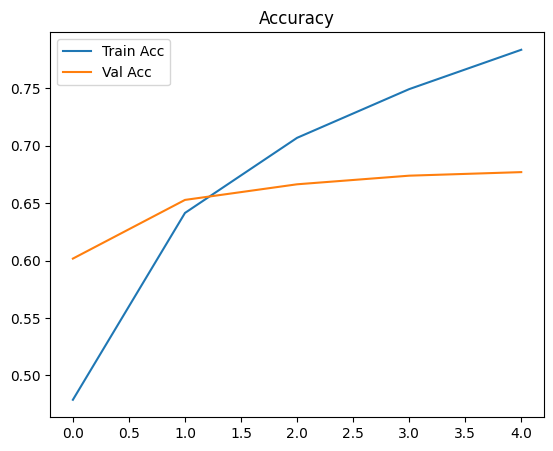

In [8]:
# Plot accuracy and loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

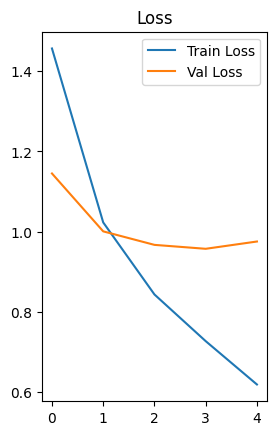

In [9]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [10]:
# Visualize some predictions
preds = model.predict(x_test[:10])
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(y_test[:10], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


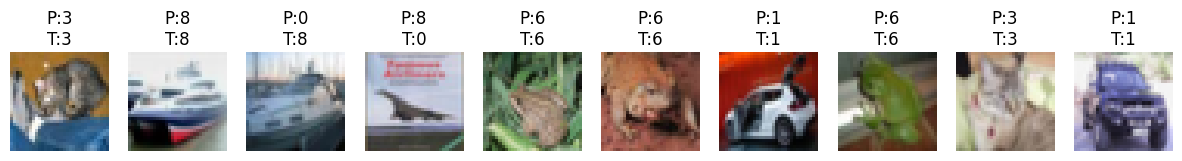

In [11]:
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"P:{pred_classes[i]}\nT:{true_classes[i]}")
    plt.axis('off')
plt.show()